In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy

In [ ]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 588.3/588.3 MB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 60.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 578.1/578.1 MB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 578.1/578.1 MB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.8/511.8 MB 2.9 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
onnx 1.13.0 requires protobuf<4,>=3.20.2, but you have protobuf 3.19.6 which is incompatible.


In [ ]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [ ]:
tf.config.list_physical_devices('GPU')

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
img_height, img_width = 250, 250

In [ ]:
batch_size = 16

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
   "/content/drive/MyDrive/IMGDIR",
   image_size = (img_height, img_width),
   batch_size = batch_size
)

Found 2956 files belonging to 7 classes.


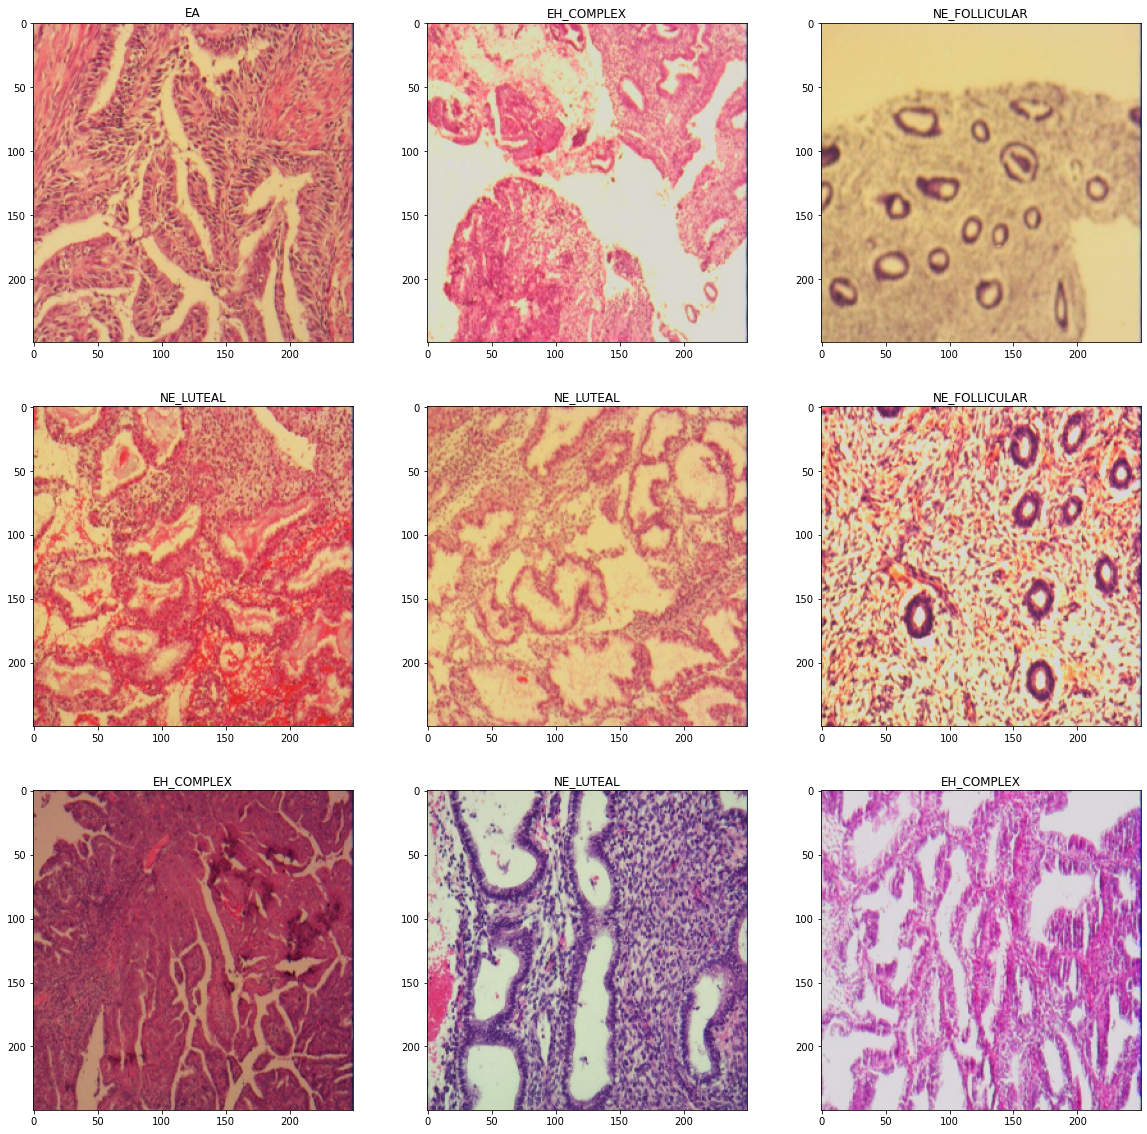

In [ ]:
class_names = ["EA", "EH_COMPLEX", "EH_SIMPLE", "EP", "NE_FOLLICULAR", "NE_LUTEAL", "NE_MENSTRUAL"]
plt.figure(figsize=(20,20))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("on")

In [ ]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten 
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [ ]:
model = Sequential()

In [ ]:
pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                                                 input_shape=(250, 250, 3),
                                                 pooling= None, 
                                                 classes=10,
                                                 weights= 'imagenet')
for layer in pretrained_model.layers:
    layer.trainable=True

In [ ]:
model.add(pretrained_model)

In [ ]:
model.add(Conv2D(filters=64, kernel_size = 10, activation= 'relu', input_shape=(250, 250, 3), padding = "same"))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=64, kernel_size = 3, 
activation= 'relu'))
model.add(MaxPooling2D(pool_size=2))

In [ ]:
# model.add(Conv2D(64, (10,10), 1, activation='relu', input_shape=(250,250,3)))
# model.add(MaxPooling2D())
# model.add(Conv2D(32, (3,3), 1, activation='relu'))
# model.add(MaxPooling2D())
# model.add(Conv2D(16, (3,3), 1, activation='relu'))
# model.add(MaxPooling2D())
# model.add(Flatten())
# model.add(Dense(256, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.add(Flatten()),
model.add(Dense(128, activation="relu"))
model.add(Activation('sigmoid'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 8, 8, 2048)        23587712  
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 64)          13107264  
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 2, 2, 64)          36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 1, 1, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 64)               

In [ ]:
import keras

In [ ]:
logdir = 'logs'
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.callbacks import ModelCheckpoint
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
check_point = keras.callbacks.ModelCheckpoint(filepath = "/content/drive/MyDrive/CallBacks",
                                            mode ='max',
                                        save_best_only = True)

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics= ['accuracy'])

In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
   "/content/drive/MyDrive/VALIDATION",
   image_size = (img_height, img_width)
)

Found 171 files belonging to 7 classes.


In [ ]:
test_ds = tf.keras.utils.image_dataset_from_directory(
   "/content/drive/MyDrive/TESTING",
   image_size = (img_height, img_width)
)

Found 175 files belonging to 7 classes.


In [ ]:
hist = model.fit(train_ds, batch_size=64, epochs=50, validation_data=val_ds, callbacks=[tensorboard_callback, check_point])

Epoch 1/50
185/185 [==============================] - 50s 269ms/step - loss: 0.0913 - accuracy: 0.9716 - val_loss: 3.5309 - val_accuracy: 0.4503
Epoch 2/50
185/185 [==============================] - 52s 277ms/step - loss: 0.0503 - accuracy: 0.9858 - val_loss: 3.0010 - val_accuracy: 0.5029
Epoch 3/50
185/185 [==============================] - 52s 277ms/step - loss: 0.0457 - accuracy: 0.9861 - val_loss: 2.9220 - val_accuracy: 0.4971
Epoch 4/50
185/185 [==============================] - 52s 277ms/step - loss: 0.0411 - accuracy: 0.9858 - val_loss: 3.4921 - val_accuracy: 0.4561
Epoch 5/50
185/185 [==============================] - 52s 280ms/step - loss: 0.0506 - accuracy: 0.9861 - val_loss: 3.8269 - val_accuracy: 0.4678
Epoch 6/50
185/185 [==============================] - 52s 278ms/step - loss: 0.0534 - accuracy: 0.9821 - val_loss: 4.0491 - val_accuracy: 0.4386
Epoch 7/50
185/185 [==============================] - 52s 276ms/step - loss: 0.0456 - accuracy: 0.9841 - val_loss: 3.8007 - val_ac

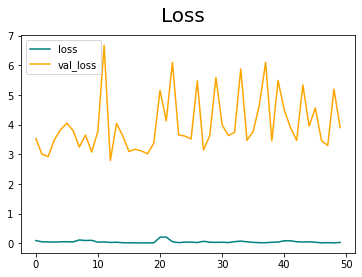

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

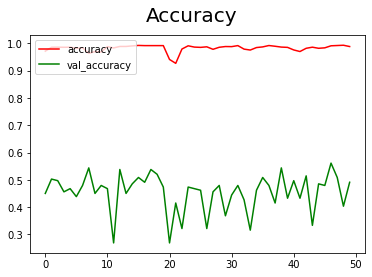

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color= 'red', label ='accuracy')
plt.plot(hist.history['val_accuracy'], color= 'green', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc='upper left')
plt.show()

In [ ]:
model.save("/content/drive/MyDrive/Models/epoch50Batchsize64-ResNet50.model")

In [ ]:
model.predict(test_ds)

11/11 [==============================] - 1s 88ms/step


array([[1.        , 0.99998057, 0.9999994 , ..., 0.5       , 0.5       ,
        0.5       ],
       [0.9999937 , 0.5       , 0.9979539 , ..., 0.5       , 0.5       ,
        0.5       ],
       [0.99987686, 0.999673  , 1.        , ..., 0.5       , 0.5       ,
        0.5       ],
       ...,
       [1.        , 1.        , 0.99999976, ..., 0.5       , 0.5       ,
        0.5       ],
       [1.        , 0.99998164, 0.9999987 , ..., 0.5       , 0.5       ,
        0.5       ],
       [1.        , 0.9999336 , 1.        , ..., 0.5       , 0.5       ,
        0.5       ]], dtype=float32)

In [ ]:
model.evaluate(test_ds)

11/11 [==============================] - 1s 88ms/step - loss: 4.6985 - accuracy: 0.4400


[4.698492050170898, 0.4399999976158142]

In [ ]:
import numpy

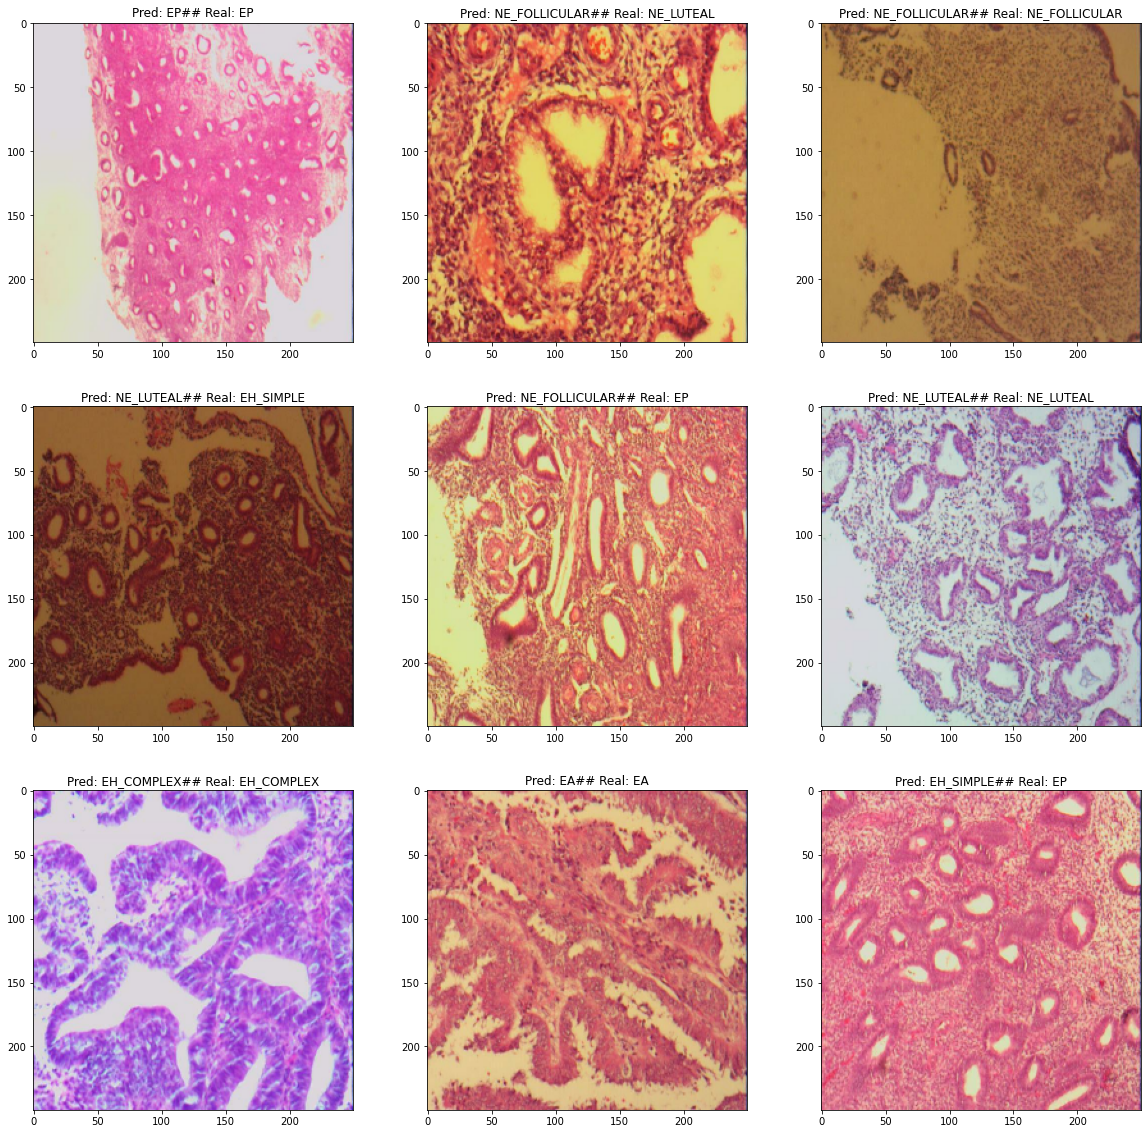

In [ ]:
plt.figure(figsize=(20,20))
for images, labels in test_ds.take(1):
  classifications = model(images)

  for i in range(9):
    at = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    index = numpy.argmax(classifications[i])
    plt.title("Pred: " + class_names[index] + "## Real: " + class_names[labels[i]])

In [ ]:
model = model = tf.keras.models.load_model("/content/drive/MyDrive/Models/epoch50Batchsize64-ResNet50.model")

In [ ]:
model.evaluate(test_ds)

6/6 [==============================] - 28s 277ms/step - loss: 4.7326 - accuracy: 0.4000


[4.732611179351807, 0.4000000059604645]

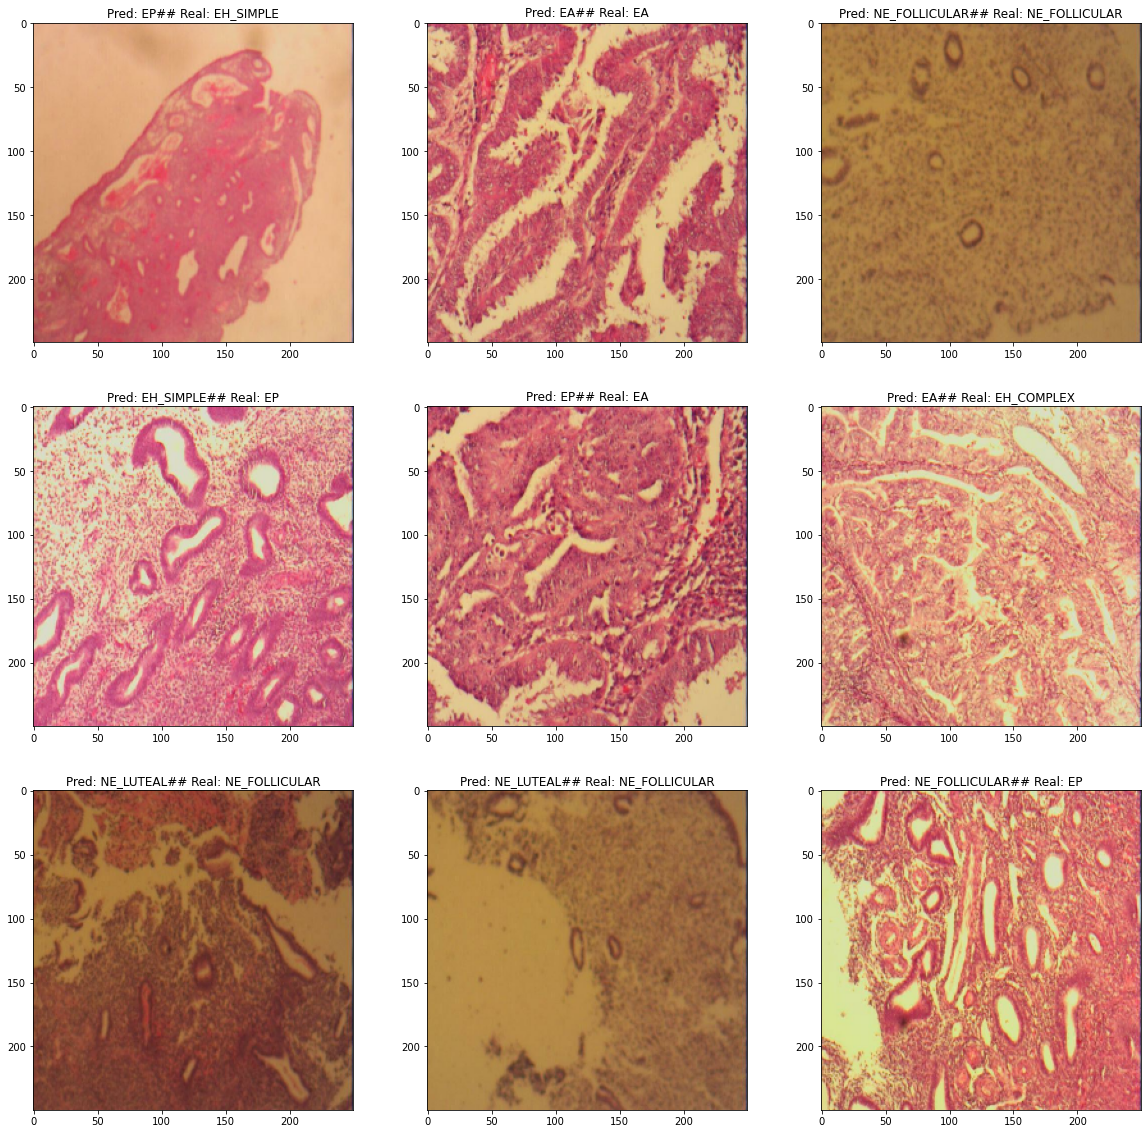

In [ ]:
plt.figure(figsize=(20,20))
for images, labels in test_ds.take(1):
  classifications = model(images)

  for i in range(9):
    at = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    index = numpy.argmax(classifications[i])
    plt.title("Pred: " + class_names[index] + "## Real: " + class_names[labels[i]])

In [ ]:
!pip install tf2onnx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached protobuf-3.20.3-cp38-cp38-manylinux_2_5_x86_64.manylinux1_x86_64.whl (1.0 MB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.19.6
    Uninstalling protobuf-3.19.6:
      Successfully uninstalled protobuf-3.19.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.9.2 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.3 which is incompatible.
tensorflow-gpu 2.9.3 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.3 which is incompatible.
tensorboard 2.9.1 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.3 which is incompatible.


In [ ]:
model = model = tf.keras.models.load_model("/content/drive/MyDrive/Models/epoch20Batchsize64-ResNet50.model")

In [ ]:
import onnx

In [ ]:
import tf2onnx

In [ ]:
onnx_model, _ = tf2onnx.convert.from_keras(model, opset=13)
onnx.save(onnx_model, "/content/drive/MyDrive/OnxxModel/model.onnx")

In [ ]:
tfLiteName = "MobileApplicationModel"

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
open("Model.tflite", "wb").write(tflite_model)

146590168